# XGBoost
* XGBoost (Extreme Gradient Boosting) is an optimized and efficient gradient boosting framework. It follows the usual Gradient Boosting process, but includes several key concepts to improve model performance, speed, and scalability.
    * Regularization: XGBoost includes L1 and L2 regularization terms to the algorithm's objective function to prevent overfitting and control tree complexity
    * Loss Functions: XGBoost gives users the option to define loss functions based on the specific problem, allowing flexibility for custom tasks
    * Tree Construction: XGBoost uses a histogram-based approach to find the best splits for the dataset. This involves precomputing statistics on features and storing them in histograms to speed up the process. XGBoost also handles sparse data by using a compressed format to skip missing/empty values
    * Missing Values: XGBoost handles missing values during the training step and can learn how to handle them based on the given data
    * Scalability: Parallel and distributed computing is supported, making it efficient for larger datasets
    * Categorical Features: Categorical features are encoded as integers and splits are done on these encodings (no need to do One-Hot Encoding)

XGBoost is currently regarded as one of the most powerful and effective machine learning algorithms. There are other packages that use the Gradient Boosting framework and are worth checking out (e.g. LightGBM, CatBoost). LightGBM focuses on optimizing memory usage and CatBoost (Categorical Boosting) handles categorical features more effectively by using a permutation-based approach to reduce overfitting from categorical features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
# Generate synthetic binary classification data
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create an XGBoost classifier
xgb = XGBClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best XGBoost model from grid search
best_xgb = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_xgb.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Best Estimators: {best_xgb.n_estimators}")
print(f"Best Learning Rate: {best_xgb.learning_rate}")
print(f"Best Max Depth: {best_xgb.max_depth}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Best Estimators: 100
Best Learning Rate: 0.1
Best Max Depth: 5
Accuracy: 0.93
F1: 0.93
Precision: 0.92
Recall: 0.94


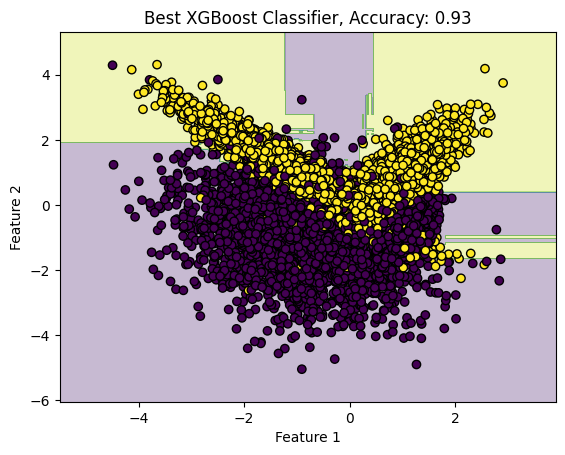

In [5]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = best_xgb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Best XGBoost Classifier, Accuracy: {accuracy:.2f}')
plt.show()